### Logistic regression

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas: 

Logit(pi) = 1/(1+ exp(-pi)) ------------------------------(i)

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k -----(ii)

In this logistic regression equation, logit(pi) is the dependent or response variable and x is the independent variable. The beta parameter, or coefficient, in this model is commonly estimated via maximum likelihood estimation (MLE). This method tests different values of beta through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimate. Once the optimal coefficient (or coefficients if there is more than one independent variable) is found, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability. For binary classification, a probability less than .5 will predict 0 while a probability greater than 0 will predict 1.  After the model has been computed, it’s best practice to evaluate the how well the model predicts the dependent variable, which is called goodness of fit. The Hosmer–Lemeshow test is a popular method to assess model fit.

Ref-https://www.ibm.com/topics/logistic-regression

In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [2]:
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
iris.data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# define the X and y
X = iris.data[['petal width (cm)']].values
y = (iris.target_names[iris.target] == 'virginica')

In [6]:
# data split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
# model
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [8]:
# Let's look at the model's estimated probabilities
X_new = np.linspace(0, 3, 1000).reshape(-1,1)

y_proba = logistic_reg.predict_proba(X_new)

decision_boundary = X_new[y_proba[:,1]>=0.5][0,0]
decision_boundary

1.6576576576576576

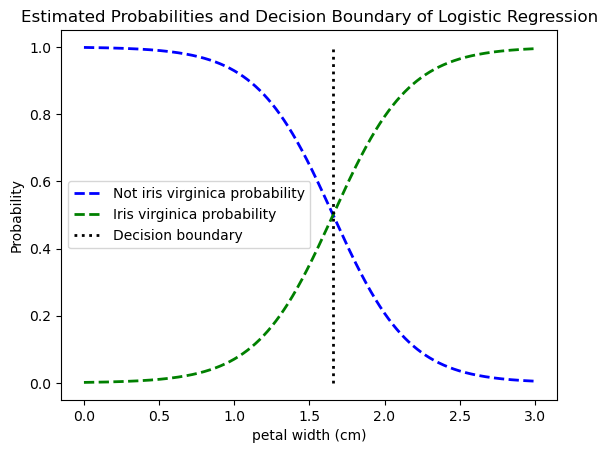

In [9]:
# plot the decision boundary
plt.plot(X_new, y_proba[:,0], "b--", linewidth=2, label="Not iris virginica probability")
plt.plot(X_new, y_proba[:,1], "g--", linewidth=2, label="Iris virginica probability")
plt.plot([decision_boundary,decision_boundary], [0,1], "k:", linewidth=2, label="Decision boundary")

plt.title("Estimated Probabilities and Decision Boundary of Logistic Regression")
plt.xlabel("petal width (cm)")
plt.ylabel("Probability")
plt.legend()
plt.show()

At the decision boundary 1.65 both virginica not virginica has equal 50% probabilities. If the petal width is greater than 1.65 cm the the classifier will predict it as virginical otherwise not.

In [10]:
logistic_reg.predict([[1.66],[1.64]])

array([ True, False])

### Softmax Regression
Softmax regression (or multinomial logistic regression) is a generalization of logistic regression to the case where we want to handle multiple classes. In logistic regression we assumed that the labels were binary: y(i)∈{0,1}. We used such a classifier to distinguish between two kinds of hand-written digits. Softmax regression allows us to handle y(i)∈{1,…,K} where K is the number of classes.

Sklearn uses softmax regression and l2 regularization by default, but we can also control that using the hyperperarmeter C

Ref-http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/

In [11]:
X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
# softmax regression model
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train,y_train)

LogisticRegression(C=30, random_state=42)

In [13]:
y_predicted =  softmax_reg.predict(X_test)
mse = mean_squared_error(y_test, y_predicted, squared=False)
print(f"MSE = {mse}")

MSE = 0.0
